# Parámetros

In [1]:
BASE_DIR = '/Users/efraflores/Desktop/EF/Corner/GeoCS'
ZIPCODES_FILE = 'MX_zipcode.csv'
OPS_FILE = 'ops_zone.csv'

# Entorno

In [2]:
from pathlib import Path

from shapely import wkt
from pandas import read_csv
from geopandas import GeoDataFrame, points_from_xy, sjoin

BASE_DIR = Path(BASE_DIR)

# Ops Zone

In [3]:
opz = read_csv(BASE_DIR.joinpath(OPS_FILE))
opz['ops_zone'] = opz['ops_zone'].apply(wkt.loads)
opz = GeoDataFrame(opz, geometry='ops_zone', crs='EPSG:6372')
print(opz.shape)
opz.sample()

(39, 5)


,city_code,city_name,zone_id,zone,ops_zone
29,MEX,Ciudad de México,9,Lejos Sur,"MULTIPOLYGON (((-99.162 19.344, -99.171 19.305..."


# Zipcodes MX

In [4]:
zipc = read_csv(BASE_DIR.joinpath(ZIPCODES_FILE))
print(zipc.shape)
zipc = GeoDataFrame(zipc, geometry=points_from_xy(zipc['lon'], zipc['lat']), crs='EPSG:6372')
zipc.sample()

(144655, 13)


,Unnamed: 0,country_code,postal_code,place_name,state_name,state_code,province_name,province_code,community_name,community_code,lat,lon,accuracy,geometry
141577,141577,MX,97143,Boulevares de Oriente,Yucatán,31,Mérida,50,Mérida,1.0,20.9758,-89.5345,1,POINT (-89.534 20.976)


# Test

<AxesSubplot:>

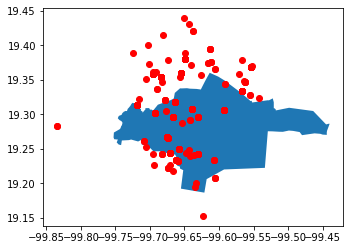

In [5]:
ax = opz[opz['city_name']=='Toluca'].loc[12:12,'ops_zone'].plot()
zipc[zipc['province_name']=='Toluca']['geometry'].plot(ax=ax, color='red')

# Intersección

In [6]:
df = sjoin(zipc, opz)
df.drop_duplicates('postal_code', inplace=True)
print(df.shape)
df.head()

(4309, 19)


,Unnamed: 0,country_code,postal_code,place_name,state_name,state_code,province_name,province_code,community_name,community_code,lat,lon,accuracy,geometry,index_right,city_code,city_name,zone_id,zone
0,0,MX,20000,Zona Centro,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1.0,21.8734,-102.2806,1,POINT (-102.281 21.873),0,AGS,Aguascalientes,157,Aguascalientes
11,11,MX,20020,Circunvalación Norte,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1.0,21.8376,-102.3210,3,POINT (-102.321 21.838),0,AGS,Aguascalientes,157,Aguascalientes
15,15,MX,20029,Villas de La Universidad,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1.0,21.8376,-102.3210,1,POINT (-102.321 21.838),0,AGS,Aguascalientes,157,Aguascalientes
33,33,MX,20060,Moderno,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1.0,21.8734,-102.2806,1,POINT (-102.281 21.873),0,AGS,Aguascalientes,157,Aguascalientes
35,35,MX,20064,Valle del Rio San Pedro,Aguascalientes,1,Aguascalientes,1,Aguascalientes,1.0,21.8734,-102.2806,1,POINT (-102.281 21.873),0,AGS,Aguascalientes,157,Aguascalientes


# Exportar resultado

In [7]:
df.to_csv(BASE_DIR.joinpath('zipcode_results.csv'), index=False, sep='\t', encoding='utf-16')
aux = read_csv(BASE_DIR.joinpath('zipcode_results.csv'), sep='\t', encoding='utf-16')
aux.to_csv(BASE_DIR.joinpath('zipcode_map.csv'), index=False)